In [2]:
import pandas as pd
import kaggle
import sys

sys.path.insert(0, '../src/')
import auto_co2 as co2
import importlib
importlib.reload(co2)

<module 'auto_co2' from 'd:\\0 PERSO\\00 LUDO\\Google Drive\\0 LUDO\\Projets\\Cours_info\\05 Projet Dts\\github\\car-co2-prediction_pre-release\\notebooks\\../src\\auto_co2\\__init__.py'>

In [4]:
#df = co2.data.load_co2_data()
df = pd.read_csv('../data/sample/cars_200.csv')

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,115551,ES,IP-0153-JT1-1,MAZDA-SUBARU-SUZUKI-TOYOTA,TOYOTA,TOYOTA MOTOR EUROPE NV SA,nan,e6*2018/858*00013*00,XPB1FM,MXPJ10(H),MXPJ10L-BHXNBW(DA),TOYOTA,YARIS,M1,M1,1,1250.000,nan,nan,101.000,2560.000,1520.000,1520.000,PETROL,M,1490.000,68.000,nan,E6 37,nan,nan,nan,nan,P,2021,2021-11-17,4.500,nan
1,56572511,BE,IP-HNP____MB6F2427-VF3-0,STELLANTIS,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,nan,E2*2007/46*0405*34,L,P,HNPJ-C12000,PEUGEOT,308,M1,M1,1,1278.000,1350.000,nan,122.000,2620.000,1563.000,1557.000,PETROL,M,1199.000,81.000,nan,nan,nan,nan,nan,nan,P,2021,2021-10-01,nan,nan
2,56638039,BE,IP-ZKX____REDU5761-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,nan,E2*2007/46*0639*12,U,H,ZKXZ-X0A000,OPEL,CORSA,M1,M1,1,1530.000,1621.000,0.000,0.000,2540.000,1490.000,1490.000,ELECTRIC,E,nan,100.000,165.000,nan,nan,nan,nan,nan,P,2021,2021-11-15,nan,nan
3,53134212,PL,nan,FORD,FORD WERKE GMBH,FORD WERKE GMBH,nan,E13*2007/46*2387*02,LSK,EHL72YX,5AAAZNALWAB,FORD,MUSTANG MACH-E,M1,M1,1,2185.000,nan,0.000,0.000,2984.000,1623.000,1623.000,ELECTRIC,E,nan,nan,nan,nan,nan,nan,nan,nan,P,2021,2021-11-29,nan,540.000
4,46738411,IT,IP-MQB37AS_A2_0817-WAU-1,VW-SAIC,AUDI AG,AUDI AG,nan,E1*2007/46*1900*19,F3,SDTSBF1,FD7FD7GC009RT51A184BIAHA3EM1BD0,AUDI,Q3 SPORTBACK,M1,M1,1,1655.000,1753.000,nan,143.000,2677.000,nan,nan,DIESEL,M,1968.000,110.000,nan,E13 28 29,nan,1.900,nan,nan,P,2021,2021-09-16,4.500,nan


<class 'pandas.io.formats.style.Styler'>


,Column,Non-Null Count,Dtype
0,ID,200 non-null,int64
1,Country,200 non-null,object
2,VFN,179 non-null,object
3,Mp,193 non-null,object
4,Mh,200 non-null,object
5,Man,200 non-null,object
6,MMS,0 non-null,float64
7,Tan,199 non-null,object
8,T,200 non-null,object
9,Va,199 non-null,object


<class 'pandas.io.formats.style.Styler'>


,Info
0,"RangeIndex: 200 entries, 0 to 199"
1,Data columns (total 38 columns):
2,37 Electric range (km) 28 non-null float64
3,"dtypes: float64(17), int64(3), object(18)"
4,memory usage: 59.5+ KB


<class 'pandas.io.formats.style.Styler'>


,Colonne,Valeurs manquantes (%)
0,Vf,100.00%
1,MMS,100.00%
2,Ernedc (g/km),100.00%
3,De,100.00%
4,Electric range (km),86.00%
5,z (Wh/km),84.50%
6,Enedc (g/km),76.00%
7,Erwltp (g/km),53.00%
8,IT,49.50%
9,Fuel consumption,41.00%


<class 'pandas.io.formats.style.Styler'>
Incomplete rows dropped:9
TOTAL NUMBER OF ROWS DROPPED:9


,Column,Non-Null Count,Dtype
0,Pool,191 non-null,object
1,MassRunningOrder,191 non-null,float64
2,Co2EmissionsWltp,191 non-null,float64
3,BaseWheel,191 non-null,float64
4,FuelType,191 non-null,object
5,EnginePower,191 non-null,float64
6,InnovativeTechnology,191 non-null,int32
7,ElectricRange,191 non-null,float64


<class 'pandas.io.formats.style.Styler'>


,Info
0,"Index: 191 entries, 0 to 199"
1,Data columns (total 8 columns):
2,7 ElectricRange 191 non-null float64
3,"dtypes: float64(5), int32(1), object(2)"
4,memory usage: 12.7+ KB


<class 'pandas.io.formats.style.Styler'>


,Colonne,count,mean,std,min,25%,50%,75%,max
0,MassRunningOrder,191.000,1446.026,285.287,935.000,1228.500,1420.000,1611.000,2320.000
1,Co2EmissionsWltp,191.000,115.937,49.337,0.000,111.000,127.000,142.000,251.000
2,BaseWheel,191.000,2650.634,164.724,1873.000,2560.000,2649.000,2724.500,3400.000
3,EnginePower,191.000,94.366,33.380,31.000,70.000,92.000,110.000,287.000
4,InnovativeTechnology,191.000,0.529,0.500,0.000,0.000,1.000,1.000,1.000
5,ElectricRange,191.000,27.215,94.192,0.000,0.000,0.000,0.000,524.000


<class 'pandas.io.formats.style.Styler'>


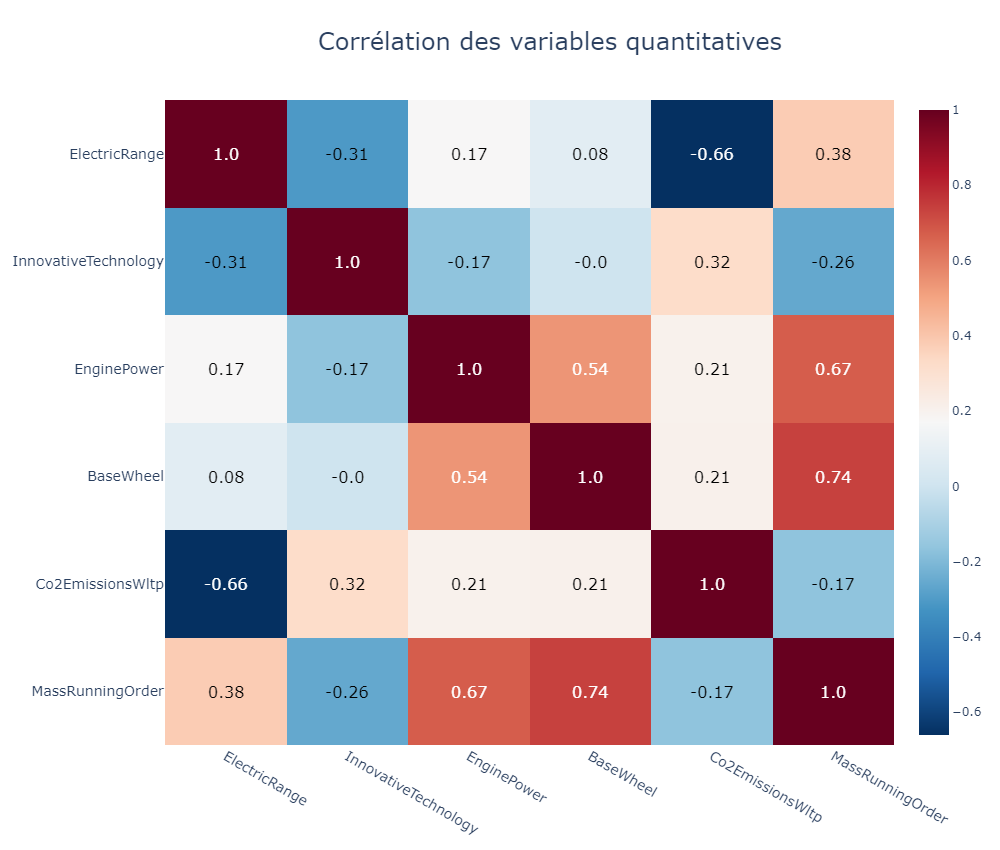

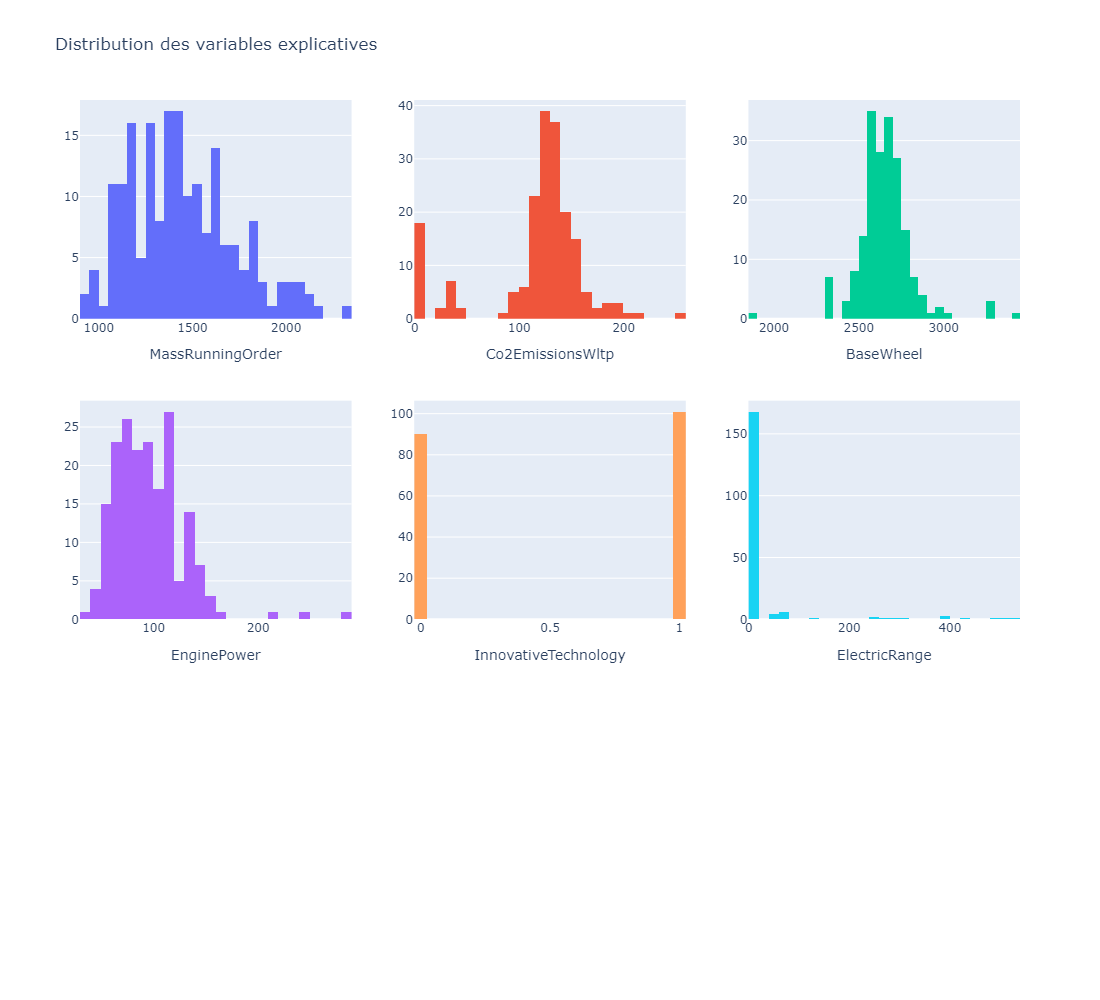

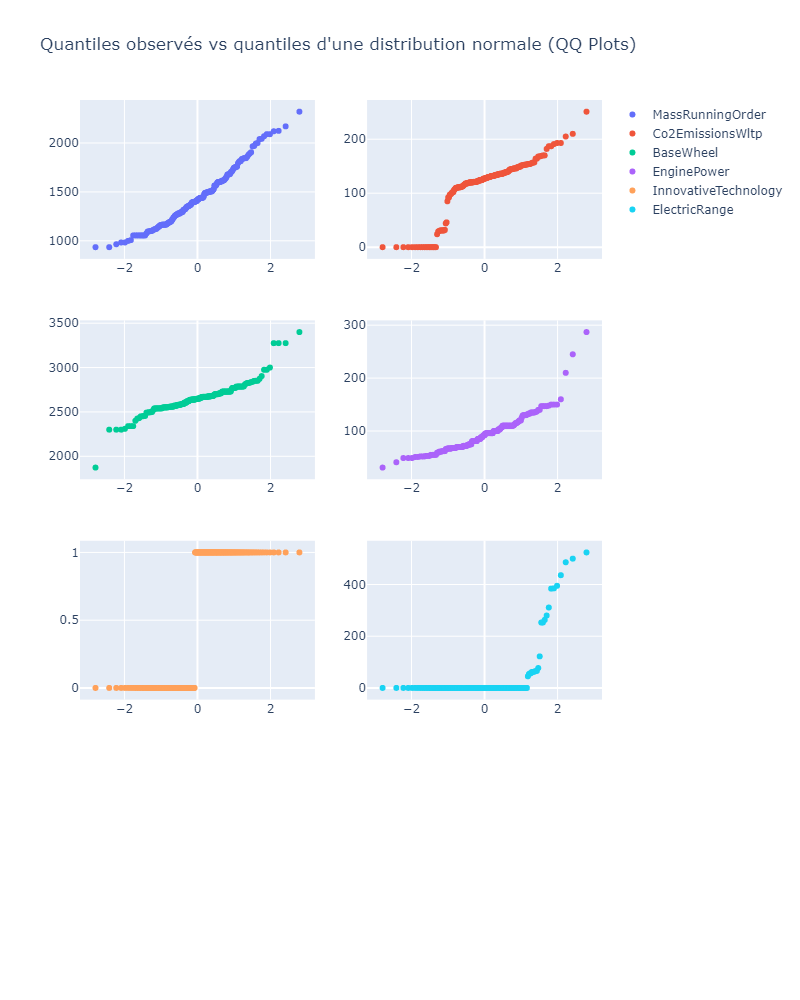

Data saved to ../data/processed/co2_regression_20240117-065902


In [5]:
# Inspection des données
co2.styles.displayer(df, title='APERCU DU JEU DE DONNEES', save=True)
co2.styles.display_info(df, title='DONNEES BRUTES', save=True) 
co2.styles.display_na(df, title='PART DE VALEURS MANQUANTES DANS LE JEU DE DONNEES', save=True)   

# Nettoyage des données
df = co2.data.ml_preprocess(df,
                               rem_axlewidth=True,
                               rem_fuel_consumption=True,
                               rem_engine_capacity=True)


# Inspection des features
co2.styles.display_info(df, title='DONNEES NETTOYEES', save=True) 
co2.styles.display_describe(df, title='STATISTIQUES DESCRIPTIVES', save=True)

co2.viz.plot_correlation_heatmap(df, interactive=False, save=True)
co2.viz.plot_feature_distributions(df, interactive=False, save=True)
co2.viz.plot_qqplots(df, interactive=False, save=True)

# One-hot encoding des variables catégorielles
df = co2.data.dummify_all_categoricals(df)


# Sauvegarde du jeu de données prêt à l'emploi pour la régression
co2.data.save_processed_data(df, classification=False, pickle=False, )